In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns

In [2]:
data = pd.read_csv('bbc.csv')

In [3]:
data.head()

,Unnamed: 0,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [4]:
data['category_id'] = data['type'].factorize()[0]

In [5]:
colslist = ['Index', 'news', 'type', 'category_id']
data.columns = colslist

In [6]:
data.head()

,Index,news,type,category_id
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,0
1,1,Aids and climate top Davos agenda\n \n Climate...,business,0
2,2,Asian quake hits European shares\n \n Shares i...,business,0
3,3,India power shares jump on debut\n \n Shares i...,business,0
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,0


Before diving head-first into training machine learning models, we should become familiar with the structure and characteristics of our dataset: these properties might inform our problem-solving approach.

A first step would be to look at some random examples, and the number of examples in each class:

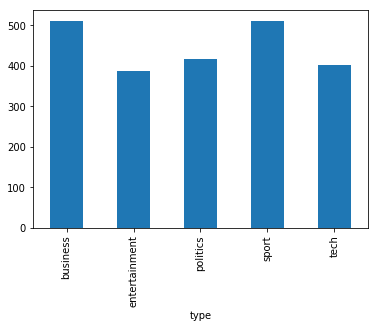

In [7]:
data.groupby('type').Index.count().plot.bar(ylim=0)

In [8]:
data.sample(5, random_state=0)

,Index,news,type,category_id
384,384,World leaders gather to face uncertainty\n \n ...,business,0
1983,1983,IBM puts cash behind Linux push\n \n IBM is sp...,tech,4
985,985,New rules tackle 'sham weddings'\n \n New rule...,politics,2
1386,1386,Double injury blow strikes Wales\n \n Wales ce...,sport,3
1294,1294,Bid to cut court witness stress\n \n New targe...,politics,2


We see that the number of articles per class is roughly balanced, which is helpful! If our dataset were imbalanced, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

# Basic preprocessing

# Stopwords removal

Stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [9]:
text_file = open("stopwords.txt", "r")
stopwords = text_file.read().split('\n')

In [17]:
#stopwords = nltk.corpus.stopwords.words('english')

In [10]:
data['news_without_stopwords'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [11]:
print(len(data['news_without_stopwords'][0]))

1463


In [12]:
print(data['news_without_stopwords'])

0       UK economy facing 'major risks' The UK manufac...
1       Aids climate top Davos agenda Climate change f...
2       Asian quake hits European shares Shares Europe...
3       India power shares jump debut Shares India's l...
4       Lacroix label bought US firm Luxury goods grou...
5       Insurance bosses plead guilty Another three US...
6       Turkey-Iran mobile deal 'at risk' Turkey's inv...
7       Parmalat return stockmarket Parmalat, Italian ...
8       WorldCom director admits lying The former chie...
9       Ebbers denies WorldCom fraud Former WorldCom c...
10      Qantas sees profits fly record Australian airl...
11      Saudi investor picks Savoy London's famous Sav...
12      Euronext 'poised LSE bid' Pan-European group E...
13      Cactus diet deal Phytopharm A slimming aid sou...
14      Wall Street cool eBay's profit Shares online a...
15      Parmalat founder offers apology The founder fo...
16      'Golden economic period' Ten years "golden" ec...
17      Brazil

# Porter Stemming

Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [13]:
ps = PorterStemmer()

In [14]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [15]:
print(data['news_without_stopwords'][0])

UK economy facing 'major risks' The UK manufacturing sector continue face "serious challenges" two years, British Chamber Commerce (BCC) said. The group's quarterly survey companies exports picked three months 2004 best levels eight years. The rise came despite exchange rates cited major concern. However, BCC UK economy faced "major risks" warned growth set slow. It recently forecast economic growth slow 3% 2004 little 2.5% 2005 2006. Manufacturers' domestic sales growth fell back slightly quarter, survey 5,196 firms found. Employment manufacturing fell job expectations lowest level year. "Despite positive news export sector, worrying signs manufacturing," BCC said. "These results reinforce concern sector's persistent inability sustain recovery." The outlook service sector "uncertain" despite increase exports orders quarter, BCC noted. The BCC confidence increased quarter manufacturing service sectors overall failed reach levels start 2004. The reduced threat interest rate increases co

In [16]:
print(data['news_porter_stemmed'][0])

UK economi face 'major risks' the UK manufactur sector continu face "seriou challenges" two years, british chamber commerc (bcc) said. the group' quarterli survey compani export pick three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc UK economi face "major risks" warn growth set slow. It recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc confid increas quarter manufactur servic sector overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confidence, said. the bank england rais interest rate five time novemb 2

# Converting to lowercase

An important pre-processing step is transforming our news articles into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [17]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [18]:
data['news_porter_stemmed'][0]

'uk economi face \'major risks\' the uk manufactur sector continu face "seriou challenges" two years, british chamber commerc (bcc) said. the group\' quarterli survey compani export pick three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc uk economi face "major risks" warn growth set slow. it recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers\' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector\' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc confid increas quarter manufactur servic sector overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confidence, said. the bank england rais interest rate five time no

# Removing Punctuation


The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [19]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')

In [20]:
data['news_porter_stemmed'][0]

'uk economi face major risks the uk manufactur sector continu face seriou challenges two years british chamber commerc bcc said the group quarterli survey compani export pick three month 2004 best level eight years the rise came despit exchang rate cite major concern however bcc uk economi face major risks warn growth set slow it recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufacturers domest sale growth fell back slightli quarter survey 5196 firm found employ manufactur fell job expect lowest level year despit posit news export sector worri sign manufacturing bcc said these result reinforc concern sector persist inabl sustain recovery the outlook servic sector uncertain despit increas export order quarter bcc noted the bcc confid increas quarter manufactur servic sector overal fail reach level start 2004 the reduc threat interest rate increas contribut improv confidence said the bank england rais interest rate five time novemb 2003 august year but rate kept hold amid

# Low frequency term filtering (count < 3)

Remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise.

In [21]:
freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()

In [22]:
freq.head()

the     8121
i       3271
it      3123
mr      3045
year    2422
dtype: int64

In [23]:
freq2 = freq[freq <= 3]
freq2

caller             3
courtney           3
honiss             3
constituency       3
nme                3
gervais            3
skeen              3
onematch           3
pipeline           3
alegr              3
nolan              3
cfca               3
1966               3
mcrae              3
decre              3
amalgam            3
litigation         3
kenyon             3
456m               3
gondri             3
liu                3
turin              3
brag               3
1943               3
xabi               3
idealist           3
troy               3
hobbi              3
foil               3
distrust           3
                  ..
dayanidhi          1
vigil              1
infomerci          1
orthodox           1
directives         1
conneri            1
confrontational    1
hova               1
ravencraft         1
breaches           1
venerable          1
1821               1
dinning            1
nasdaq100          1
24drinking         1
nickname           1
2881         

In [24]:
freq3 = list(freq2.index.values)
freq3

['caller',
 'courtney',
 'honiss',
 'constituency',
 'nme',
 'gervais',
 'skeen',
 'onematch',
 'pipeline',
 'alegr',
 'nolan',
 'cfca',
 '1966',
 'mcrae',
 'decre',
 'amalgam',
 'litigation',
 'kenyon',
 '456m',
 'gondri',
 'liu',
 'turin',
 'brag',
 '1943',
 'xabi',
 'idealist',
 'troy',
 'hobbi',
 'foil',
 'distrust',
 'bullying',
 'istanbul',
 'shortages',
 'figaro',
 'finished',
 'tenth',
 'lyricist',
 'drawings',
 '104m',
 'choke',
 'obikwelu',
 'whine',
 'eva',
 'worthington',
 'mentor',
 'ups',
 'contender',
 'olds',
 'rk',
 'forese',
 'mystifi',
 'nights',
 'tpm',
 'tyranni',
 'disposal',
 'ah',
 'ipc',
 'sensitive',
 'eyebrow',
 'opening',
 'slaves',
 'stormi',
 'lichtenstein',
 'easygroup',
 'soninlaw',
 'hapless',
 'poem',
 '335m',
 'barton',
 'swipe',
 'horn',
 'bigbudget',
 'sixyear',
 'indign',
 'rev',
 'genet',
 'atm',
 'fleming',
 'druri',
 'stylu',
 'zombic',
 'torrid',
 'angi',
 'undercov',
 'numeraci',
 'bagl',
 'apollo',
 'mikko',
 'replies',
 'catchi',
 'doha',
 '

In [25]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [26]:
data = data[['Index', 'type', 'category_id', 'news_porter_stemmed']]

# TF-IDF

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.


TF-IDF is the multiplication of the TF and IDF 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

sklearn.feature_extraction.text.TfidfVectorizer will be used to calculate a tf-idf vector for each of our documents.

In [28]:
features = tfidf.fit_transform(data.news_porter_stemmed).toarray()
labels = data.category_id
features.shape

(2225, 15286)

Each of our 2225 documents is now represented by 15286 features, representing the tf-idf score for different unigrams and bigrams.

This representation is not only useful for solving our classification task, but also to familiarize ourselves with the dataset. For example, we can use the chi-squared test to find the terms are the most correlated with each of the categories:

In [29]:
data.columns = ['Index', 'newstype', 'category_id', 'news_porter_stemmed']

In [30]:
category_id_df = data[['newstype', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'newstype']].values)

In [31]:
from sklearn.feature_selection import chi2

N = 3
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . bank
  . Most correlated bigrams:
       . econom growth
       . interest rate
       . stock market
# 'entertainment':
  . Most correlated unigrams:
       . actor
       . star
       . film
  . Most correlated bigrams:
       . best film
       . the film
       . box offic
# 'politics':
  . Most correlated unigrams:
       . blair
       . tori
       . labour
  . Most correlated bigrams:
       . lib dem
       . toni blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . champion
       . coach
       . cup
  . Most correlated bigrams:
       . australian open
       . grand slam
       . six nation
# 'tech':
  . Most correlated unigrams:
       . technolog
       . comput
       . user
  . Most correlated bigrams:
       . search engin
       . oper system
       . mobil phone


In [32]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']


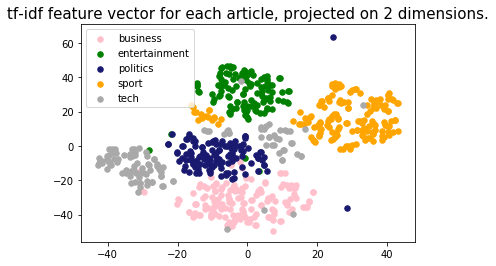

In [33]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

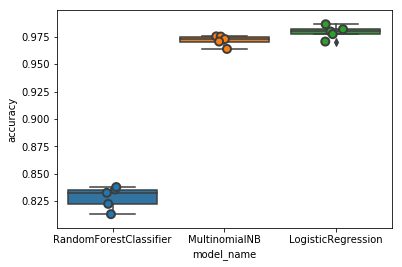

In [85]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

In [87]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data2.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted')

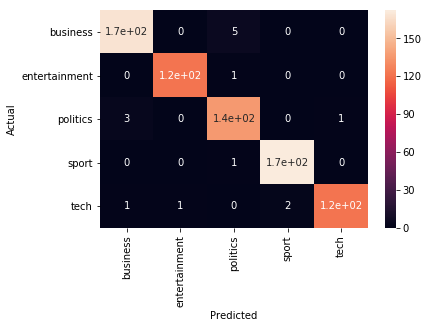

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.newstype.values, yticklabels=category_id_df.newstype.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [91]:
model.fit(features, labels)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
from sklearn.feature_selection import chi2

N = 5
for newstype, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(newstype))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . firm
       . bank
       . compani
       . market
       . share
  . Top bigrams:
       . chief execut
       . the compani
       . the firm
       . stock market
       . econom growth
# 'entertainment':
  . Top unigrams:
       . film
       . star
       . music
       . singer
       . band
  . Top bigrams:
       . box offic
       . the film
       . lo angel
       . tv show
       . the show
# 'politics':
  . Top unigrams:
       . labour
       . parti
       . mr
       . minist
       . blair
  . Top bigrams:
       . mr blair
       . toni blair
       . mr brown
       . lib dem
       . prime minist
# 'sport':
  . Top unigrams:
       . win
       . match
       . club
       . coach
       . cup
  . Top bigrams:
       . six nation
       . australian open
       . grand slam
       . bbc sport
       . world cup
# 'tech':
  . Top unigrams:
       . comput
       . user
       . technolog
       . softwar
       . onlin
  . To

In [94]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'

